<a href="https://colab.research.google.com/github/Harinipsp/Diabetes-prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score ,f1_score ,recall_score
db_data=pd.read_csv('/content/diabetes.csv')
db_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
db_data.shape

(768, 9)

In [ ]:
db_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
db_data['Outcome'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64>

In [ ]:
db_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
x=db_data.drop(columns='Outcome', axis=1)
y=db_data['Outcome']
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


<Axes: >

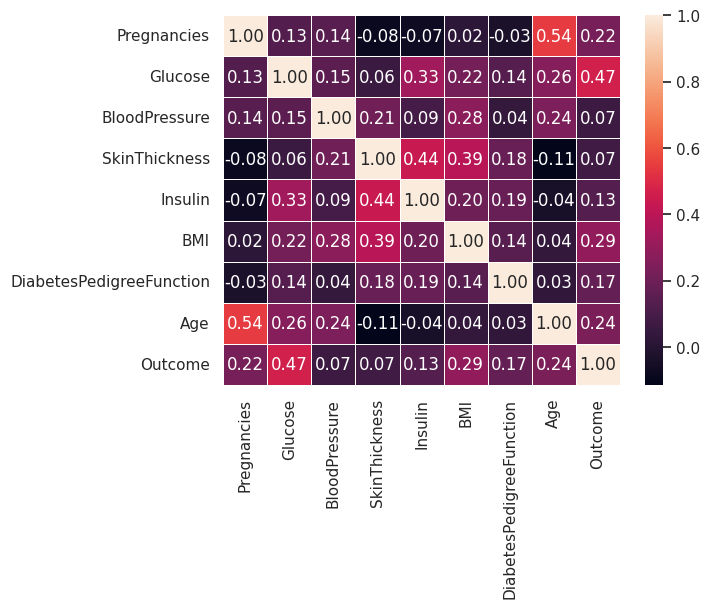

In [ ]:
sns.heatmap(db_data.corr() , annot=True , fmt='0.2f' , linewidth=0.5 )

<Axes: xlabel='Outcome', ylabel='count'>

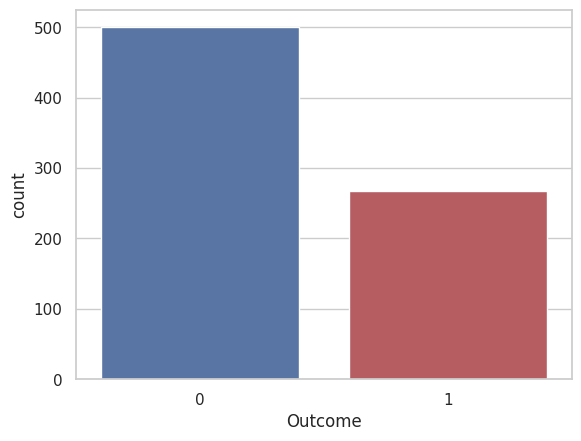

In [ ]:
sns.countplot(x=db_data["Outcome"] , palette = ["b", "r"])

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y ,test_size=0.2)
result = []

In [ ]:
model1 = LogisticRegression()
model2 =RandomForestClassifier()
model3 = GradientBoostingClassifier(n_estimators=1000)
model4=SVC()

In [ ]:
column =["LogisticRegression" , "RandomForestClassifier" ,"GradientBoostingClassifier" , "SVC" ]

LogisticRegression()
accuracy :0.8051948051948052


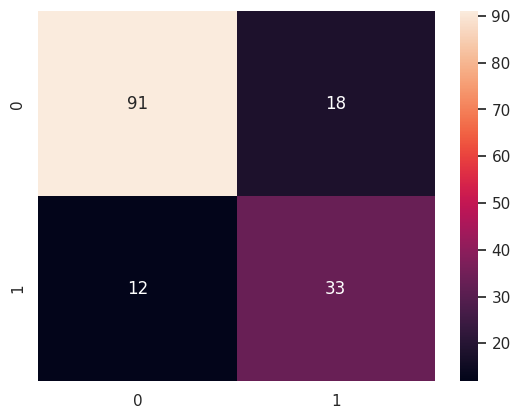

In [ ]:
def cal(model , ):
    model.fit(xtrain , ytrain)
    ypred=model.predict(xtest)
    accuracy =accuracy_score(ypred, ytest)

    result.append(accuracy)

    sns.heatmap(confusion_matrix(ypred , ytest) , annot=True)
    print(model)
    print(f"accuracy :{accuracy}")
cal(model1 )

RandomForestClassifier()
accuracy :0.8051948051948052


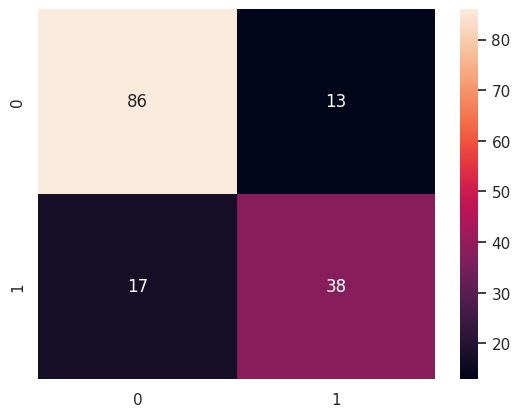

In [ ]:
cal(model2)

GradientBoostingClassifier(n_estimators=1000)
accuracy :0.7467532467532467


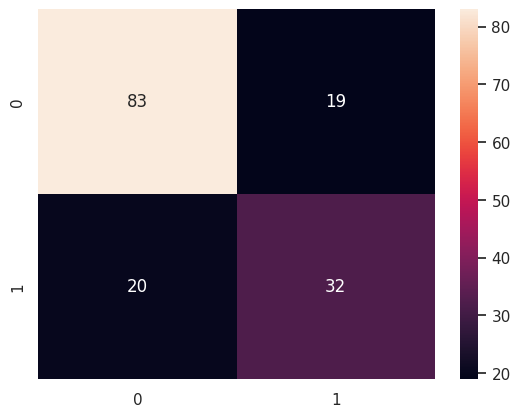

In [ ]:
cal(model3)

SVC()
accuracy :0.7987012987012987


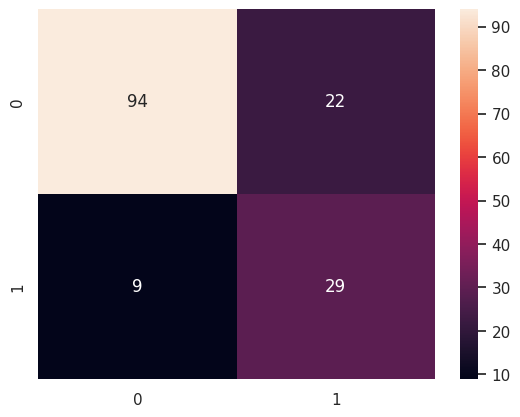

In [ ]:
cal(model4)

In [ ]:
result

[0.8051948051948052,
 0.8051948051948052,
 0.7467532467532467,
 0.7987012987012987,
 0.7987012987012987,
 0.7987012987012987]

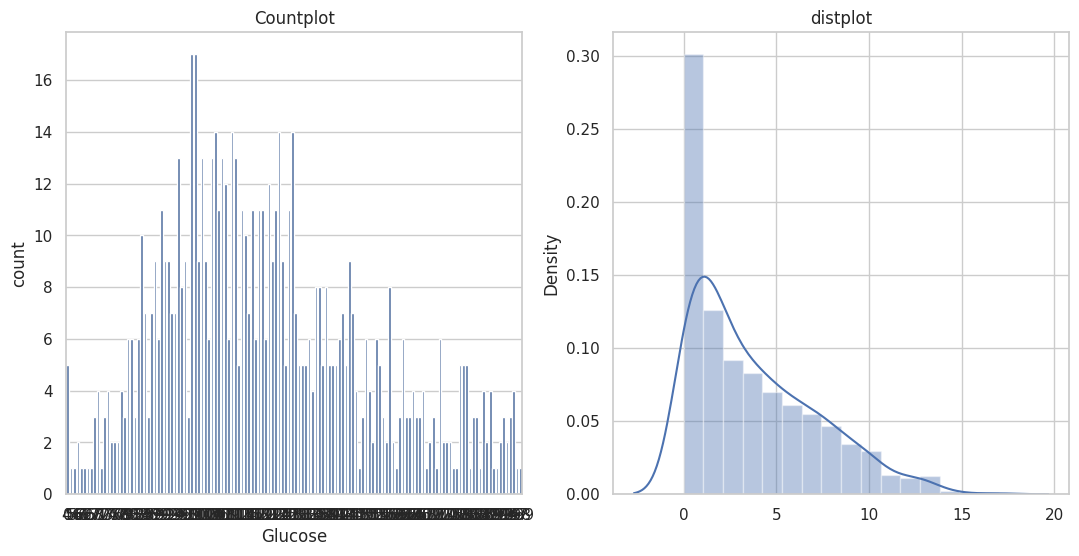

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("Countplot")
sns.countplot(x=db_data["Glucose"])

plt.subplot(1,3,2)
plt.title("distplot")
sns.distplot(x=db_data["Pregnancies"])
plt.show()

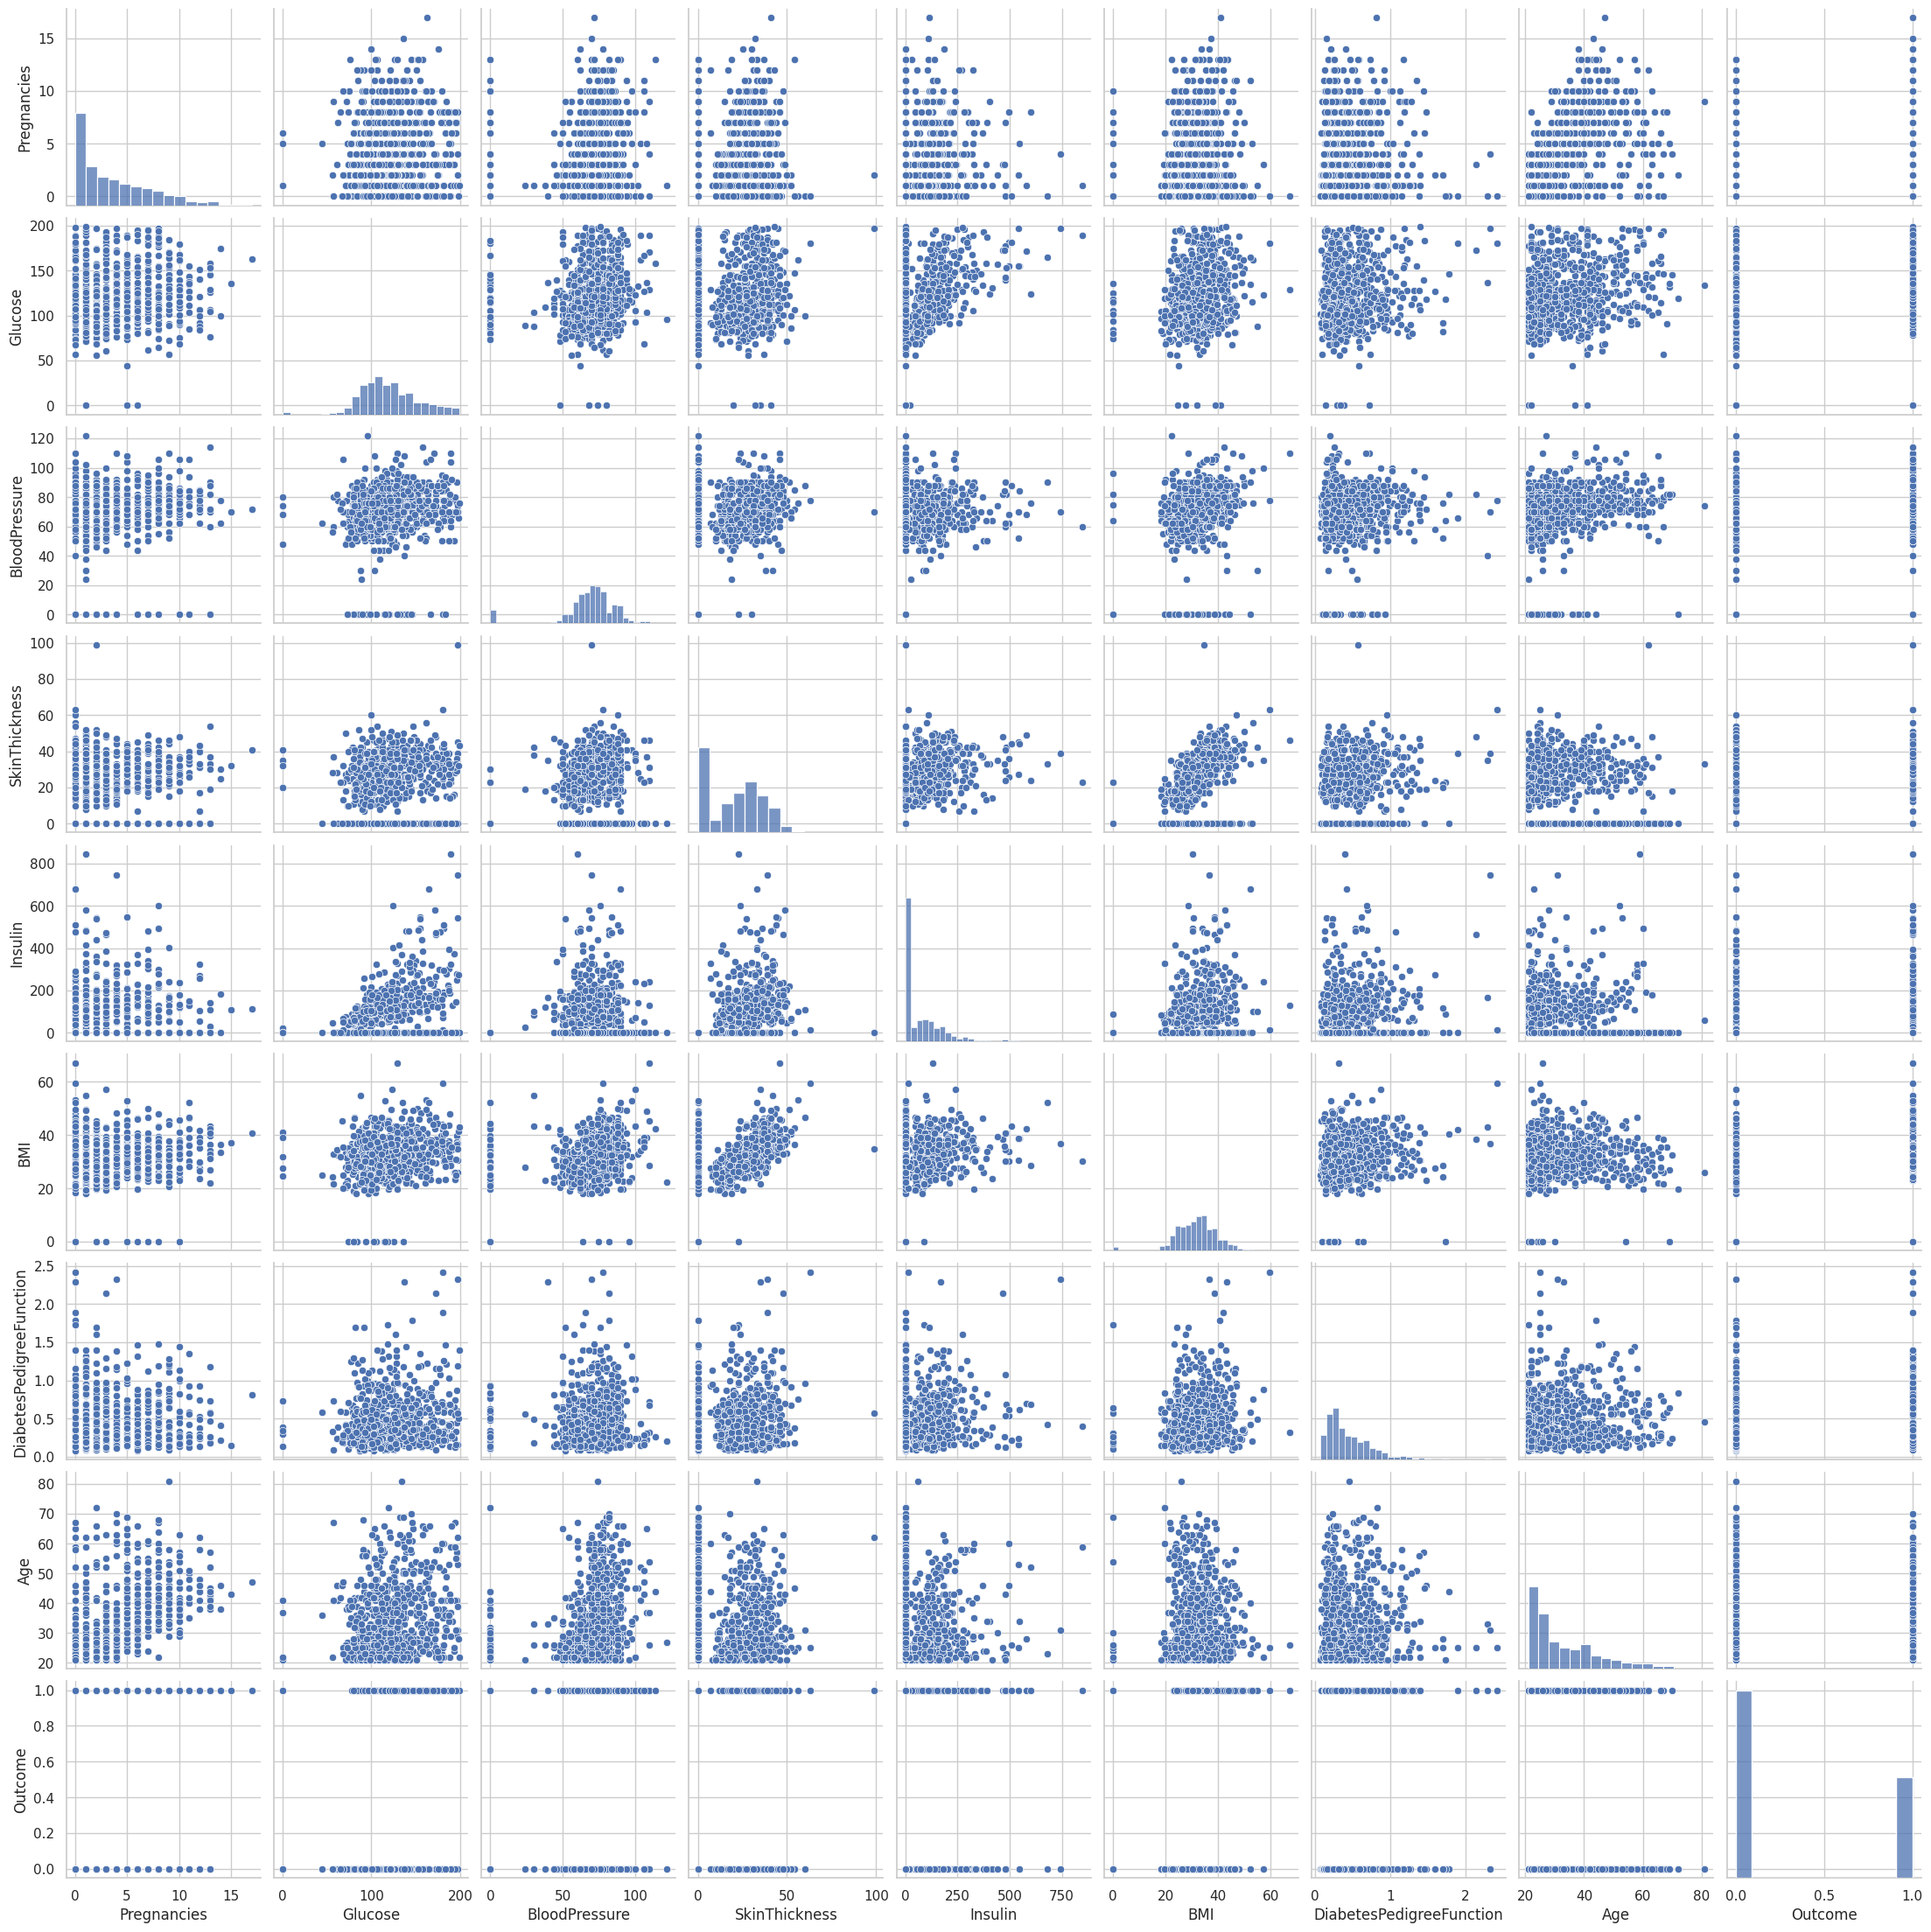

In [ ]:

sns.pairplot(data=db_data)
# Show plot

plt.show()